<a href="https://colab.research.google.com/github/Adarsh-shoonya00/Model_selection/blob/main/Heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Here,we can see that there is no missing point in our dataset**


In [ ]:
X = pd.get_dummies(df.drop('DEATH_EVENT',axis =1),drop_first=True)

In [ ]:
y = df['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=170,max_features="log2",random_state=101)

In [ ]:
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=170,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [ ]:

preds = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix

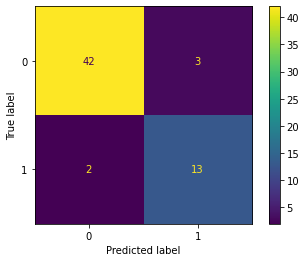

In [ ]:
plot_confusion_matrix(rfc,X_test,y_test)

In [ ]:
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.81      0.87      0.84        15

    accuracy                           0.92        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.92      0.92      0.92        60



In [ ]:
def model_trials(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  preds =model.predict(X_test)
  plot_confusion_matrix(model,X_test,y_test)
  print(classification_report(y_test,preds))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=7,max_features="log2",random_state=101)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.81      0.87      0.84        15

    accuracy                           0.92        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.92      0.92      0.92        60



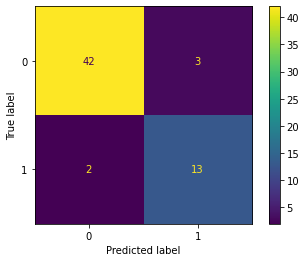

In [ ]:
model_trials(forest_model,X_train,y_train,X_test,y_test);

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grids = {'n_estimators':[100,120,150,180,200],
               'criterion':['gini','entropy'],
               'max_features':['log2','sqrt',2,3,4,5]}
  

grid = GridSearchCV(forest_model,param_grids) 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.81      0.87      0.84        15

    accuracy                           0.92        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.92      0.92      0.92        60



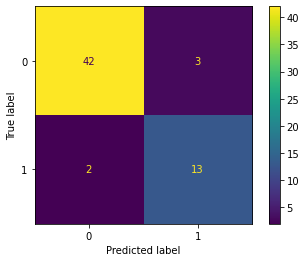

In [ ]:
model_trials(grid,X_train,y_train,X_test,y_test);

In [ ]:
from sklearn.svm import SVC()

In [ ]:
svc = SVC()
param_grids = {'C':[0.05,0.1,0.3,0.5,0.7,1,1.5,2,3,5,10,50],
               'kernel':['linear','poly','rbf','sigmoid'],
               'degree' :[1,2,3,4,5,6,10,15],
               'gamma':['auto','scale']
               }


grid = GridSearchCV(svc,param_grids)               

In [ ]:
model_trials(grid,X_train,y_train,X_test,y_test)